# Wheel Encoder Localization Math

It would be nice to be able to determine position by using only the wheel encoder information. This notebook explores some of the math required to do so.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skvideo.io
import cv2
import scipy.ndimage
from matplotlib import animation, rc
import fisheye
%matplotlib inline

C:\Users\corey\Anaconda2\envs\rustler\lib\site-packages\skvideo\__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)


In [3]:
from basic_units import cm
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt


xcenter, ycenter = 0.38*cm, 0.52*cm
width, height = 1e-1*cm, 3e-1*cm
angle = -30

theta = np.deg2rad(np.arange(0.0, 360.0, 1.0))
x = 0.5 * width * np.cos(theta)
y = 0.5 * height * np.sin(theta)

rtheta = np.radians(angle)
R = np.array([
    [np.cos(rtheta), -np.sin(rtheta)],
    [np.sin(rtheta),  np.cos(rtheta)],
    ])


x, y = np.dot(R, np.array([x, y]))
x += xcenter
y += ycenter

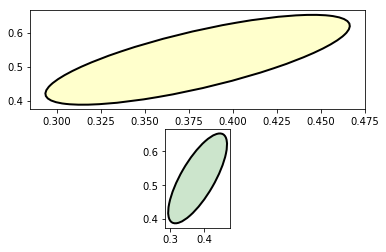

In [4]:
fig = plt.figure()
ax = fig.add_subplot(211, aspect='auto')
ax.fill(x, y, alpha=0.2, facecolor='yellow',
        edgecolor='yellow', linewidth=1, zorder=1)

e1 = patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)

ax.add_patch(e1)

ax = fig.add_subplot(212, aspect='equal')
ax.fill(x, y, alpha=0.2, facecolor='green', edgecolor='green', zorder=1)
e2 = patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)


ax.add_patch(e2)
fig.savefig('ellipse_compare')

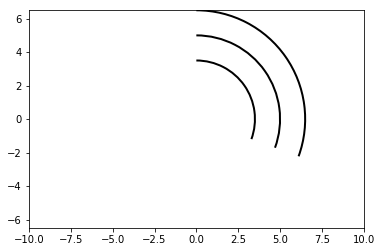

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='auto')
plt.axis('equal')
ax.set_xlim(-10, 10)
e1 = patches.Arc((0, 0), 10, 10,
                     angle=angle, theta1=10, theta2=120, 
                     linewidth=2, fill=False, zorder=2)
e2 = patches.Arc((0, 0), 7, 7,
                     angle=angle, theta1=10, theta2=120, 
                     linewidth=2, fill=False, zorder=2)
e3 = patches.Arc((0, 0), 13, 13,
                     angle=angle, theta1=10, theta2=120, 
                     linewidth=2, fill=False, zorder=2)
ax.add_patch(e1)
ax.add_patch(e2)
ax.add_patch(e3)